In [4]:
import pandas as pd
dcorona = pd.read_csv("C:/Users/Mariana/Dropbox (Pessoal)/1º sem 2020/MBA/Dados/Corona.csv", encoding= 'unicode_escape')
dcorona.head(10)

,Unnamed: 0,Province.State,Country.Region,Lat,Long,date,cases,type
0,1,NaN,Japan,35.67620,139.6503,01/22/2020,2,confirmed
1,2,NaN,South Korea,37.56650,126.9780,01/22/2020,1,confirmed
2,3,NaN,Thailand,13.75630,100.5018,01/22/2020,2,confirmed
3,4,Anhui,Mainland China,31.82571,117.2264,01/22/2020,1,confirmed
4,5,Beijing,Mainland China,40.18238,116.4142,01/22/2020,14,confirmed
5,6,Chongqing,Mainland China,30.05718,107.8740,01/22/2020,6,confirmed
6,7,Fujian,Mainland China,26.07783,117.9895,01/22/2020,1,confirmed
7,8,Guangdong,Mainland China,23.33841,113.4220,01/22/2020,26,confirmed
8,9,Guangxi,Mainland China,23.82908,108.7881,01/22/2020,2,confirmed
9,10,Guizhou,Mainland China,26.81536,106.8748,01/22/2020,1,confirmed


In [5]:
# número de casos, por tipo (confirmed, death, recovered)
casos = dcorona[['cases', 'type']] #salvando em "casos" apenas as variáveis 'cases' e 'type'
casos

# agrupando os dados por tipo
somas = casos.groupby("type",as_index = False).sum() 

somas = somas.sort_values(by='cases',ascending=False)  #ordenando de forma decrescente os valores gastos 
somas

,type,cases
0,confirmed,71226
2,recovered,10865
1,death,1770


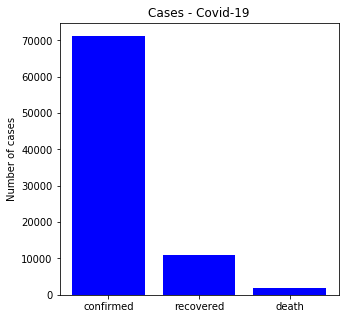

In [6]:
# Gráfico de barras

plt.figure(figsize = (5, 5)) #tamanho da figura
plt.bar(somas['type'],somas['cases'].values, color="blue") #gráfico de barras

plt.ylabel('Number of cases')  #nome para o eixo x
plt.title('Cases - Covid-19')  #título do gráfico
 
plt.show()  #método show() para mostrar o gráfico na tela

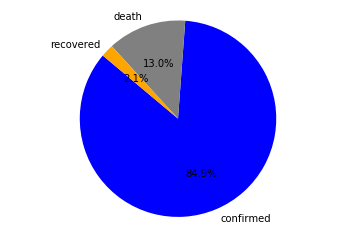

In [7]:
# Gráfico de setores (gráfico de pizza)

labels = 'confirmed', 'death', 'recovered'
sizes = somas['cases'].values
colors = ['blue', 'gray', 'orange']

plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', startangle=140)

plt.axis('equal') #faz o gráfico circular
plt.show()


In [3]:
import matplotlib.pyplot as plt
tab=df.pivot_table(index="Country.Region",values="cases",aggfunc=("sum"))
print(tab)

                      cases
Country.Region             
Australia                23
Belgium                   1
Cambodia                  2
Canada                    8
Egypt                     1
Finland                   2
France                   17
Germany                  17
Hong Kong                60
India                     6
Italy                     3
Japan                    72
Macau                    15
Mainland China        82959
Malaysia                 29
Nepal                     2
Others                  355
Philippines               5
Russia                    4
Singapore                93
South Korea              38
Spain                     4
Sri Lanka                 2
Sweden                    1
Taiwan                   23
Thailand                 48
UK                       17
US                       18
United Arab Emirates     13
Vietnam                  23


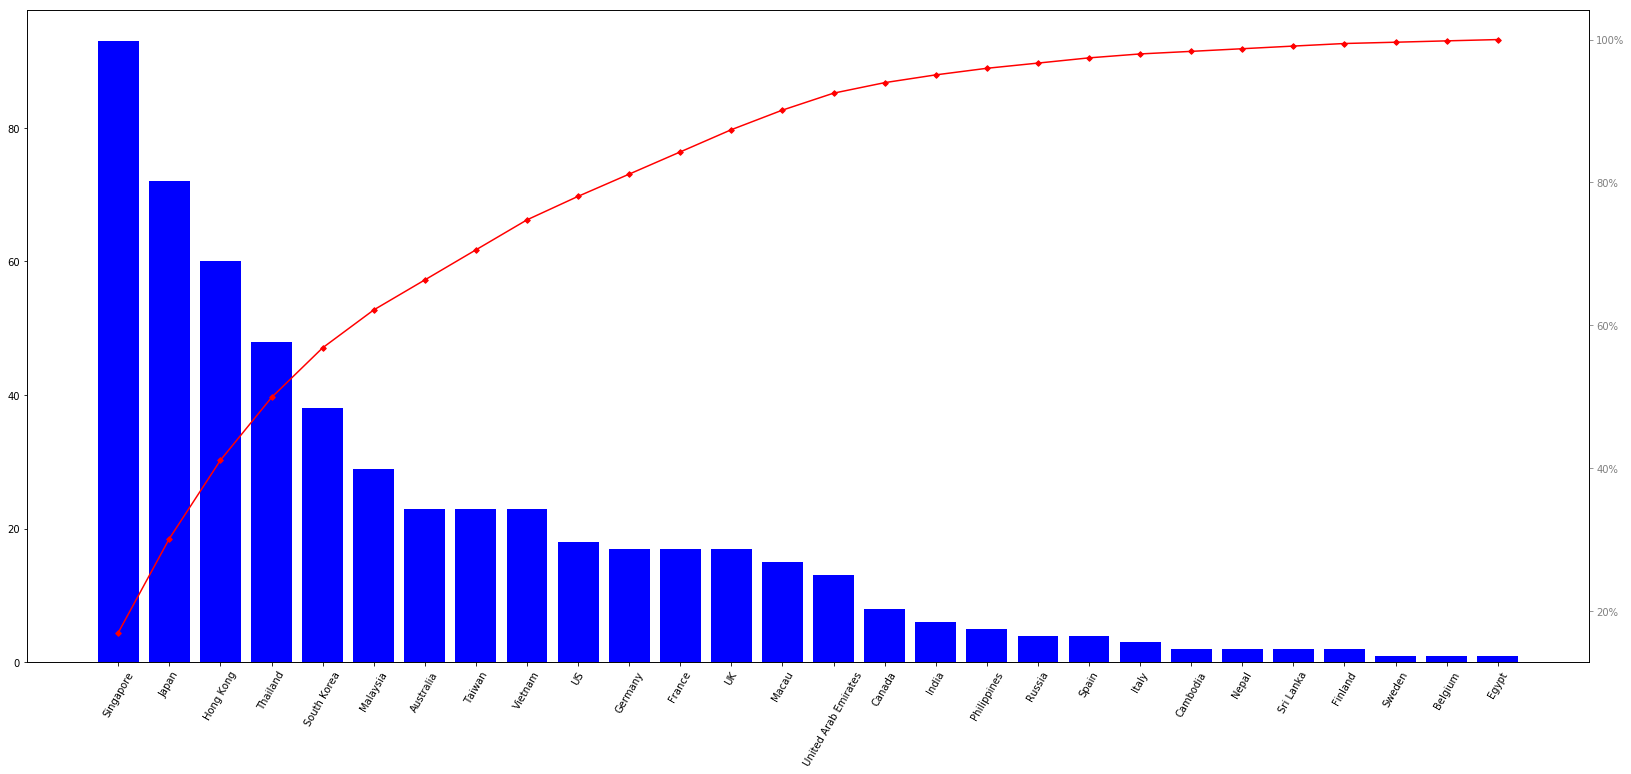

In [10]:
# Gráfico de Pareto 

from matplotlib.ticker import PercentFormatter

# Importa o módulo de regex apenas para igonrar maiúsculo e minúsculo
import re

# casos por região
dcorona.pivot_table(index="Country.Region",values="cases",aggfunc=("count","mean","std"))

# filtro para casos que NÃO contenham 'China' em Country.Region  
dcorona = dcorona[~dcorona['Country.Region'].str.contains('China', flags = re.IGNORECASE)]
dcorona = dcorona[~dcorona['Country.Region'].str.contains('Others', flags = re.IGNORECASE)]

casos = dcorona[['Country.Region', 'cases']] 
casos

somas = casos.groupby("Country.Region",as_index = False).sum() 

somas = somas.sort_values(by='cases',ascending=False)  #ordenando de forma decrescente os casos 
somas

somas["ACUMULADO"] = somas["cases"].cumsum()  #soma acumulada dos valores
total = somas["cases"].sum()  #total de casos (geral)
total = total.round(2)  #arredondamento em duas casas decimais
somas["ACUMULADO_%"] = (somas["ACUMULADO"]/(total))*100  #soma acumulada em percentual 
somas["ACUMULADO_%"] = somas["ACUMULADO_%"].round(2)  #arredondamento o percentual acumulado em duas casas decimais
somas


fig, ax = plt.subplots() 
ax.bar(somas['Country.Region'],somas['cases'], color="blue")  #gráfico de barras
ax2 = ax.twinx()
ax2.plot(somas['Country.Region'], somas["ACUMULADO_%"], color="red", marker="D", ms=4) # plotando a curva
ax2.yaxis.set_major_formatter(PercentFormatter())  #colocando os valores do eixo do segundo gráfico em porcentagem

ax.tick_params(axis="x", labelrotation = 60)   # definindo a legenda para cada barra do eixo x; labelrotation é a inclinação 
ax2.tick_params(axis="y", colors="gray")   #inserindo os valores no eixo  do segundo gráfico; 

plt.gcf().set_size_inches(28, 12) # alterar tamanho do gráfico


In [12]:
somas

,Country.Region,cases,ACUMULADO,ACUMULADO_%
17,Singapore,93,93,17.00
11,Japan,72,165,30.16
8,Hong Kong,60,225,41.13
23,Thailand,48,273,49.91
18,South Korea,38,311,56.86
13,Malaysia,29,340,62.16
0,Australia,23,363,66.36
22,Taiwan,23,386,70.57
27,Vietnam,23,409,74.77
25,US,18,427,78.06
